# TD Réseau Sémantique

**Réalisation par : Nassima RHANNOUCH**

# Exercice 1 : Réseau sémantique Oiseau / Mammifère / Chauve-souris

**Énoncé :**  
On dispose des faits suivants :  
- Un oiseau est un animal qui peut voler.  
- Un mammifère est un animal qui allaite ses petits.  
- Une chauve-souris est à la fois un mammifère et un oiseau.  
- Les chauves-souris ne pondent pas d’œufs.  

**Questions :**  
1. Construisez le réseau sémantique.  
2. Quelles propriétés la chauve-souris hérite-t-elle ?  
3. Quels conflits apparaissent ?

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

 Propriétés héritées par la chauve-souris : {'pond des œufs', 'peut voler', 'allaite ses petits', 'ne pond pas d’œufs'}

 Conflits détectés :
 - Conflit : pond des œufs  / ne pond pas d’œufs 


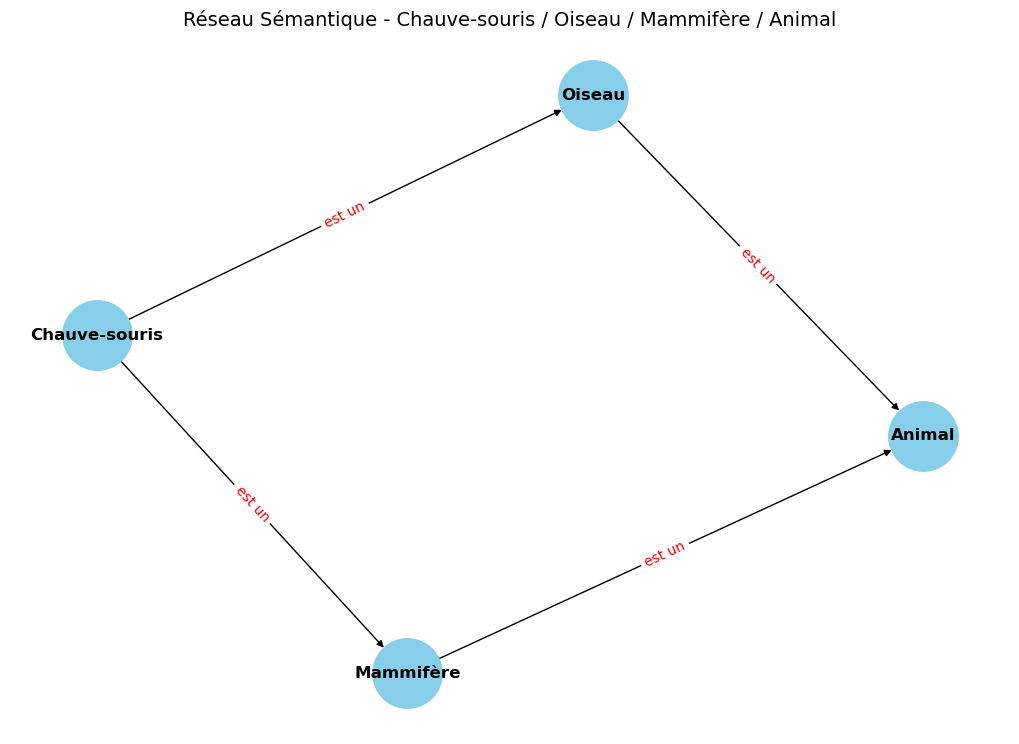

In [2]:
G = nx.DiGraph()

G.add_edge("Oiseau", "Animal", relation="est un")
G.add_edge("Mammifère", "Animal", relation="est un")
G.add_edge("Chauve-souris", "Oiseau", relation="est un")
G.add_edge("Chauve-souris", "Mammifère", relation="est un")

proprietes = {
    "Animal": [],
    "Oiseau": ["peut voler", "pond des œufs"],
    "Mammifère": ["allaite ses petits"],
    "Chauve-souris": ["ne pond pas d’œufs"] 
}

def heriter_proprietes(concept):
    props = set(proprietes.get(concept, []))
    for parent in G.successors(concept):
        props |= heriter_proprietes(parent)
    return props

props_chauve_souris = heriter_proprietes("Chauve-souris")
print(" Propriétés héritées par la chauve-souris :", props_chauve_souris)

conflits = []
if "pond des œufs" in props_chauve_souris and "ne pond pas d’œufs" in props_chauve_souris:
    conflits.append("Conflit : pond des œufs  / ne pond pas d’œufs ")

if conflits:
    print("\n Conflits détectés :")
    for c in conflits:
        print(" -", c)
else:
    print("\n Aucun conflit détecté.")

plt.figure(figsize=(10,7))
pos = nx.spring_layout(G, seed=42)  
nx.draw(G, pos, with_labels=True, node_size=2500, node_color="skyblue", font_size=12, font_weight="bold")

edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)
plt.title("Réseau Sémantique - Chauve-souris / Oiseau / Mammifère / Animal", fontsize=14)
plt.show()


# Exercice 2 : Propagation d’héritage - Dauphins

**Énoncé :**  
On a les règles suivantes :  
- Tous les poissons vivent dans l’eau.  
- Tous les animaux qui vivent dans l’eau peuvent nager.  
- Les dauphins sont des mammifères.  
- Les mammifères sont des animaux.  
- Les dauphins vivent dans l’eau.  

**Objectif :**  
En utilisant uniquement le réseau sémantique et la propagation d’héritage, démontrez que les dauphins peuvent nager.

🔹 Propriétés héritées par le dauphin : {"vit dans l'eau", 'peut nager'}

 Démonstration : Le dauphin peut nager.


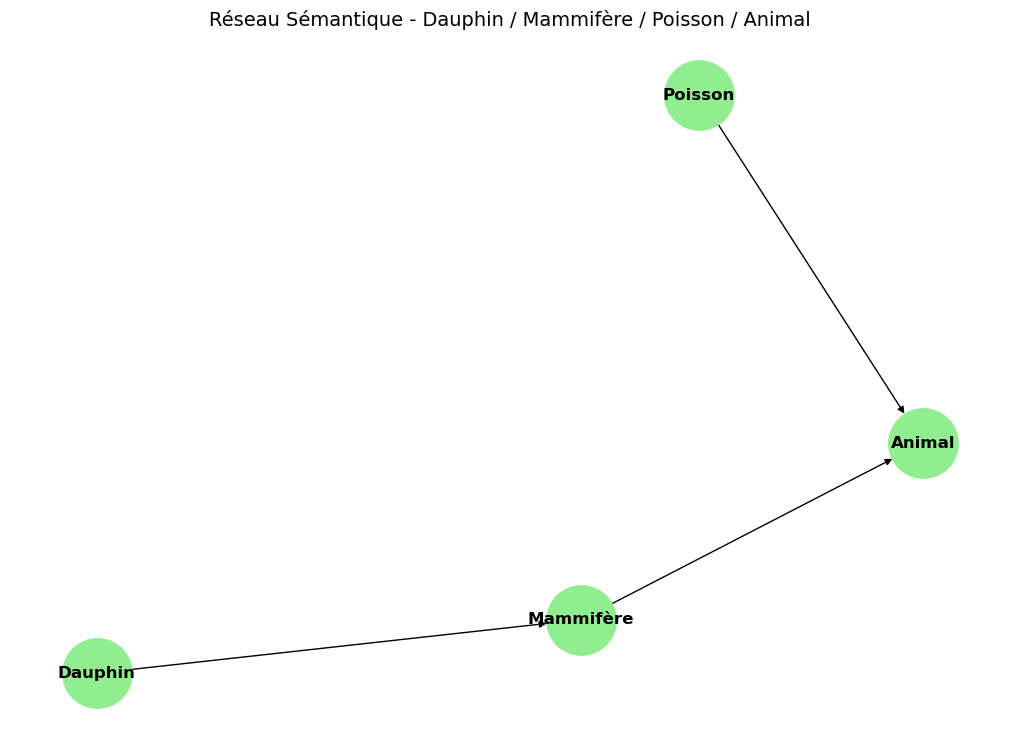

In [ ]:

G = nx.DiGraph()

G.add_edge("Poisson", "Animal")
G.add_edge("Mammifère", "Animal")
G.add_edge("Dauphin", "Mammifère")

proprietes = {
    "Animal": [],
    "Poisson": ["vit dans l'eau"],     
    "Mammifère": [],                  
    "Dauphin": ["vit dans l'eau"]     
}

def heriter_proprietes(concept):
    """
    Fonction récursive pour hériter des propriétés des parents
    """
    props = set(proprietes.get(concept, []))
    for parent in G.successors(concept):  
        props |= heriter_proprietes(parent)
    return props

def appliquer_regle_nager(concept):
    props = heriter_proprietes(concept)
    if "vit dans l'eau" in props:
        props.add("peut nager")
    return props

props_dauphin = appliquer_regle_nager("Dauphin")

print(" Propriétés héritées par le dauphin :", props_dauphin)
if "peut nager" in props_dauphin:
    print("\n Démonstration : Le dauphin peut nager.")
else:
    print("\n Le dauphin ne peut pas nager selon les règles.")

plt.figure(figsize=(10,7))
pos = nx.spring_layout(G, seed=42) 
nx.draw(G, pos, with_labels=True, node_size=2500, node_color="lightgreen", font_size=12, font_weight="bold")
plt.title("Réseau Sémantique - Dauphin / Mammifère / Poisson / Animal", fontsize=14)
plt.show()


# Exercice 3 : Réseau sémantique Personne / Étudiant / Enseignant / Professeur

**Énoncé :**  
On veut représenter :  
- Une personne possède un âge (valeur numérique).  
- Un étudiant est une personne qui étudie un domaine.  
- Un enseignant est une personne qui enseigne un domaine.  
- Un professeur est à la fois enseignant et chercheur.  
- Le domaine enseigné doit être le même que le domaine étudié pour un même cours.  

**Questions :**  
1. Construisez le réseau (nœuds, liens, types).  
2. Identifiez le type de contrainte.

Type de contrainte : La contrainte 'le domaine enseigné doit être le même que le domaine étudié' est une CONTRAINTE DE COHÉRENCE / ÉGALITÉ.


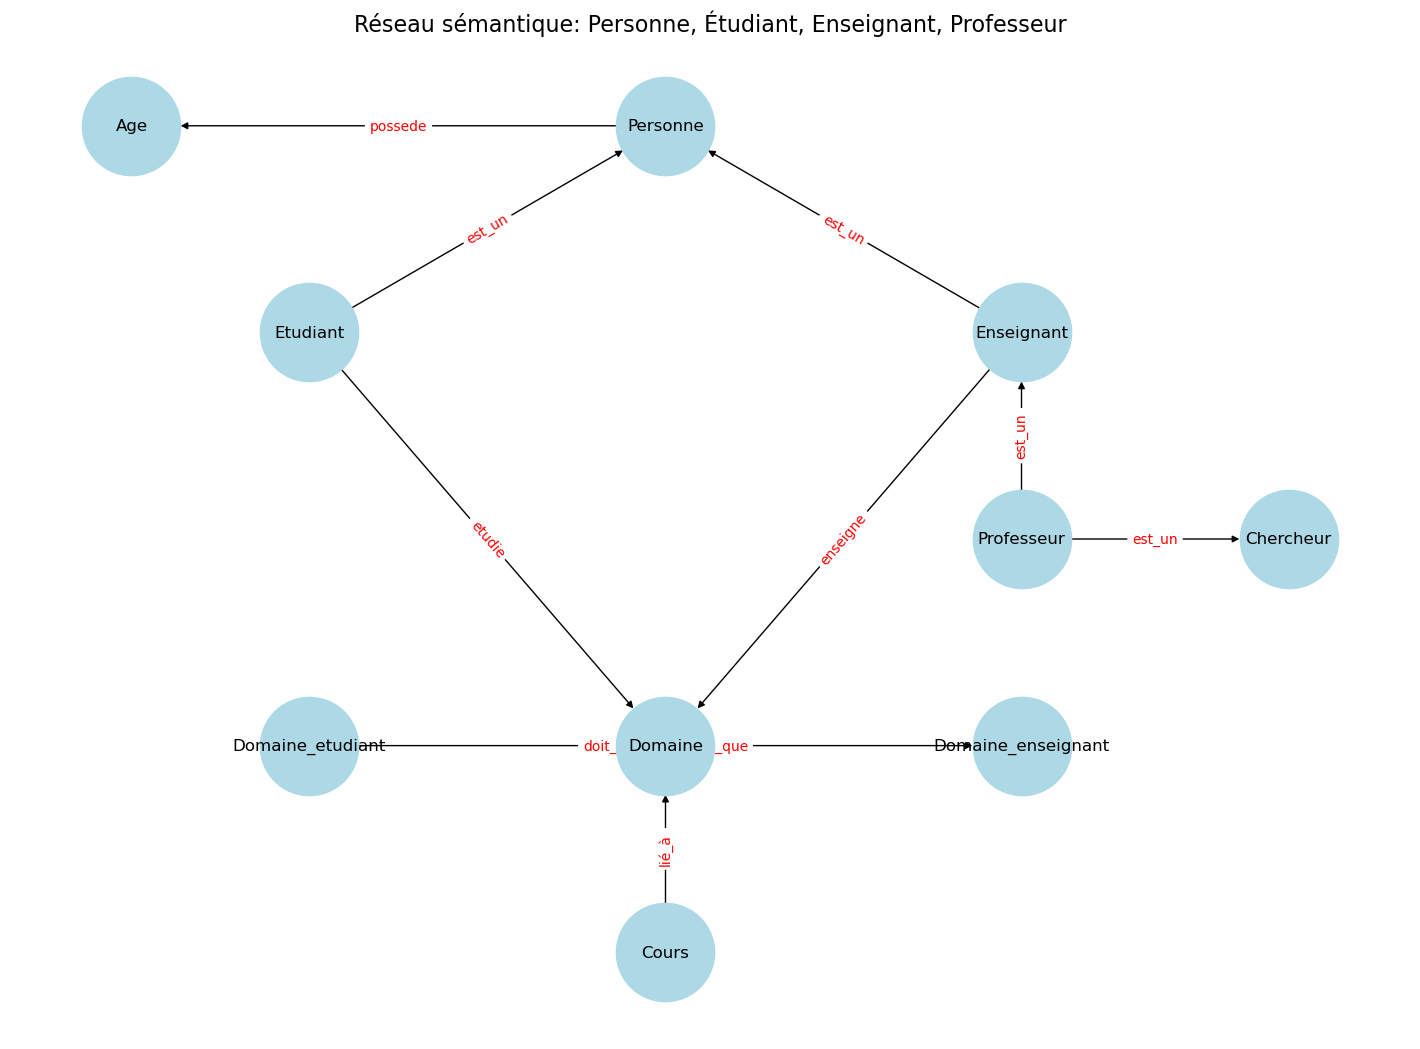

In [4]:
G = nx.DiGraph()

nodes = ["Personne", "Etudiant", "Enseignant", "Professeur", "Chercheur", 
         "Domaine", "Cours", "Age", "Domaine_etudiant", "Domaine_enseignant"]
for node in nodes:
    G.add_node(node, type="concept")

# Relations
G.add_edge("Etudiant", "Personne", relation="est_un")
G.add_edge("Enseignant", "Personne", relation="est_un")
G.add_edge("Professeur", "Enseignant", relation="est_un")
G.add_edge("Professeur", "Chercheur", relation="est_un")
G.add_edge("Personne", "Age", relation="possede")
G.add_edge("Etudiant", "Domaine", relation="etudie")
G.add_edge("Enseignant", "Domaine", relation="enseigne")
G.add_edge("Cours", "Domaine", relation="lié_à")
G.add_edge("Domaine_etudiant", "Domaine_enseignant", relation="doit_etre_le_meme_que")

print("Type de contrainte : La contrainte 'le domaine enseigné doit être le même que le domaine étudié' est une CONTRAINTE DE COHÉRENCE / ÉGALITÉ.")
pos = {
    "Personne": (0, 0),
    "Etudiant": (-2, -2),
    "Enseignant": (2, -2),
    "Professeur": (2, -4),
    "Chercheur": (3.5, -4),
    "Domaine": (0, -6),
    "Cours": (0, -8),
    "Age": (-3, 0),
    "Domaine_etudiant": (-2, -6),
    "Domaine_enseignant": (2, -6)
}

plt.figure(figsize=(14, 10))  # largeur=14, hauteur=10
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw(G, pos, with_labels=True, node_size=5000, node_color="lightblue", font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)
plt.title("Réseau sémantique: Personne, Étudiant, Enseignant, Professeur", fontsize=16)
plt.show()


# Exercice 4 : Propagation d’activation - Réseau Animal

**Énoncé :**  
On construit le réseau suivant :  
- Chien → est un → Animal  
- Chat → est un → Animal  
- Animal → est un → ÊtreVivant  
- Chien → lié à → Os  
- Chat → lié à → Lait  
- Os → type → Nourriture  

On active initialement le nœud **Chien** et on applique une **propagation d’activation** (niveau = 3, facteur = 0.5). 

Chien : 1.00
Animal : 0.50
Chat : 0.00
ÊtreVivant : 0.25
Os : 0.50
Lait : 0.00
Nourriture : 0.25


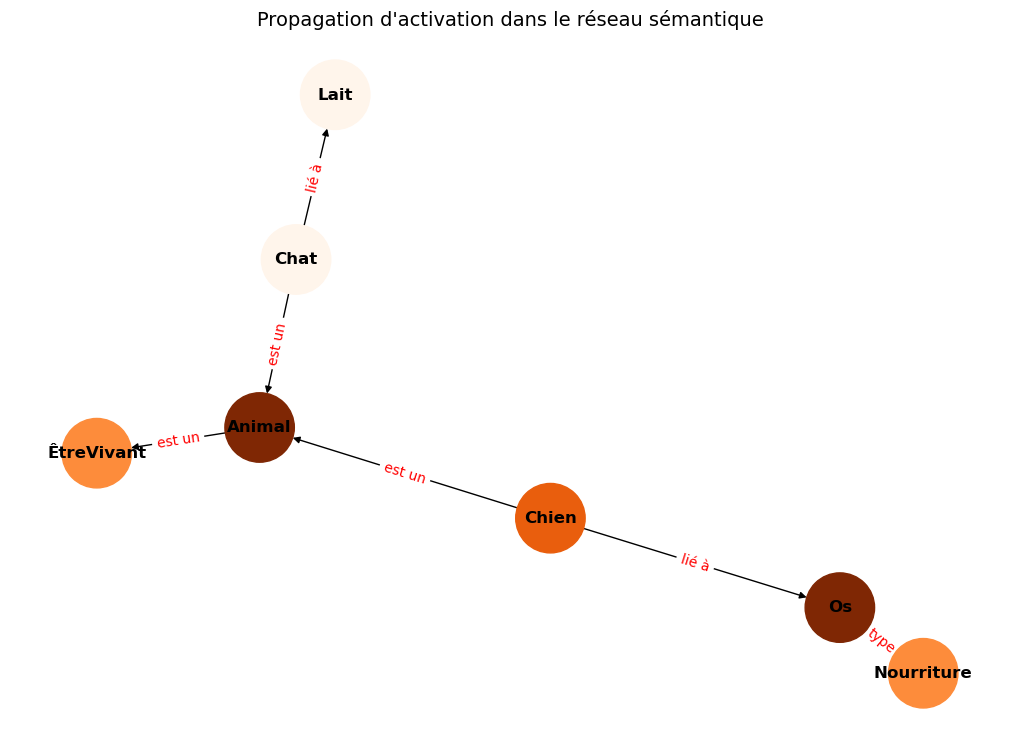

In [ ]:
G = nx.DiGraph()
G.add_edge("Chien", "Animal", relation="est un")
G.add_edge("Chat", "Animal", relation="est un")
G.add_edge("Animal", "ÊtreVivant", relation="est un")
G.add_edge("Chien", "Os", relation="lié à")
G.add_edge("Chat", "Lait", relation="lié à")
G.add_edge("Os", "Nourriture", relation="type")

activation = {node: 0 for node in G.nodes()}
activation["Chien"] = 1.0  

niveau_max = 3   
facteur = 0.5    

def propager(G, activations, niveau, facteur):
    """
    Fonction récursive pour propager l'activation dans le graphe
    """
    if niveau == 0:
        return activations
    
    nouvelle_activation = activations.copy()
    for node, act in activations.items():
        if act > 0:
            for voisin in G.successors(node):
                nouvelle_activation[voisin] += act * facteur
    return propager(G, nouvelle_activation, niveau - 1, facteur)

activation_finale = propager(G, activation, niveau_max, facteur)

reseau = {
    "Chien": ["Animal", "Os"],
    "Chat": ["Animal", "Lait"],
    "Animal": ["ÊtreVivant"],
    "Os": ["Nourriture"]
}
for niveau in range(1, niveau_max + 1):
    nouveaux = {}
    for noeud, valeur in activation.items():
        if noeud in reseau:
            for voisin in reseau[noeud]:
                nouveaux[voisin] = max(nouveaux.get(voisin, 0), valeur * facteur)
    activation.update(nouveaux)

for n, a in activation.items():
    print(f"{n} : {a:.2f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
pos = nx.spring_layout(G, seed=42)
node_colors = [activation_finale[n]*1.5 for n in G.nodes()]  
nx.draw(G, pos, with_labels=True, node_size=2500, node_color=node_colors, cmap=plt.cm.Oranges, font_size=12, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)
plt.title("Propagation d'activation dans le réseau sémantique", fontsize=14)
plt.show()


# Exercice 5 : Propriétés héritées des oiseaux

**Énoncé :**  
- Les oiseaux peuvent voler.  
- Les oiseaux nocturnes chassent la nuit.  
- Les hiboux sont des oiseaux nocturnes.  
- Les pingouins sont des oiseaux mais ne volent pas.  
- Les hiboux ne vivent pas dans l’eau.  

**Objectif :**  
Déterminer pour le Pingouin et le Hibou les propriétés héritées finales via le réseau sémantique et la propagation d’héritage.

 Propriétés héritées par le Hibou : {"ne vit pas dans l'eau", 'peut voler', 'chasse la nuit'}
 Propriétés héritées par le Pingouin : {'ne peut pas voler', 'peut voler'}


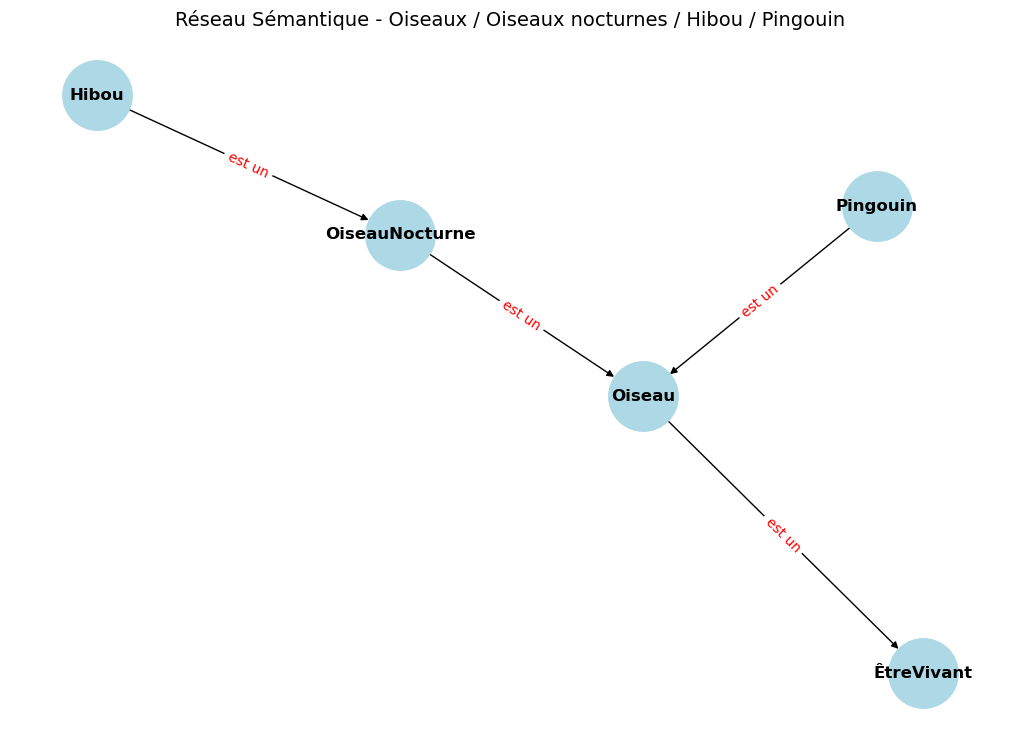

In [6]:
G = nx.DiGraph()

G.add_edge("Oiseau", "ÊtreVivant", relation="est un")
G.add_edge("OiseauNocturne", "Oiseau", relation="est un")
G.add_edge("Hibou", "OiseauNocturne", relation="est un")
G.add_edge("Pingouin", "Oiseau", relation="est un")

proprietes = {
    "Oiseau": ["peut voler"],
    "OiseauNocturne": ["chasse la nuit"],
    "Hibou": ["ne vit pas dans l'eau"],  
    "Pingouin": ["ne peut pas voler"]   
}

def heriter_proprietes(concept):
    """
    Hérite des propriétés des parents et ajoute les propriétés propres.
    """
    props = set(proprietes.get(concept, []))
    for parent in G.successors(concept):  
        props |= heriter_proprietes(parent)
    return props

props_hibou = heriter_proprietes("Hibou")
props_pingouin = heriter_proprietes("Pingouin")

print(" Propriétés héritées par le Hibou :", props_hibou)
print(" Propriétés héritées par le Pingouin :", props_pingouin)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2500, node_color="lightblue", font_size=12, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)
plt.title("Réseau Sémantique - Oiseaux / Oiseaux nocturnes / Hibou / Pingouin", fontsize=14)
plt.show()


# Exercice 6 : Réseau sémantique Étudiant / Ali

**Énoncé :**  
- (∀x) Étudiant(x) → Personne(x)  
- (∀x) Étudiant(x) → ¬Travailleur(x)  
- Étudiant(Ali)  

**Objectif :**  
Traduire ces assertions logiques en réseau sémantique et propager les relations pour déterminer les propriétés d’Ali.

 Ali est un : {'Personne', 'Étudiant'}
 Ali n'est pas un : set()


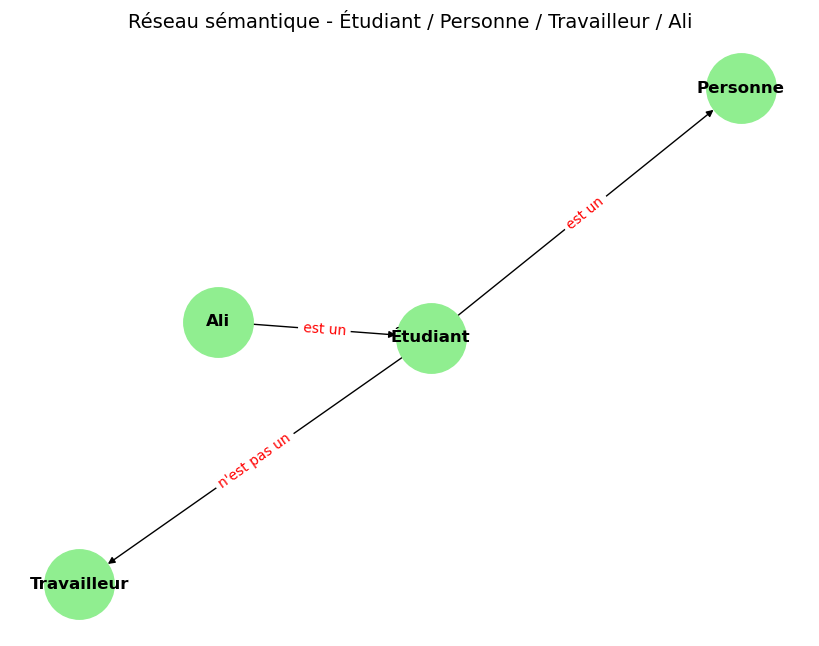

In [7]:
G = nx.DiGraph()

nodes = ["Personne", "Étudiant", "Travailleur", "Ali"]
for node in nodes:
    G.add_node(node)

G.add_edge("Étudiant", "Personne", relation="est un")
G.add_edge("Étudiant", "Travailleur", relation="n'est pas un")  
G.add_edge("Ali", "Étudiant", relation="est un")

def heriter_relations(concept, graphe):
    """
    Hérite des relations 'est un' et 'n'est pas un' de manière récursive
    """
    est_un = set()
    n_est_pas_un = set()
    
    for parent in graphe.successors(concept):
        relation = graphe[concept][parent]["relation"]
        if relation == "est un":
            est_un.add(parent)
            est_un |= heriter_relations(parent, graphe)[0]
        elif relation == "n'est pas un":
            n_est_pas_un.add(parent)  
    return est_un, n_est_pas_un

est_un_ali, n_est_pas_un_ali = heriter_relations("Ali", G)

print(" Ali est un :", est_un_ali)
print(" Ali n'est pas un :", n_est_pas_un_ali)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2500, node_color="lightgreen", font_size=12, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)
plt.title("Réseau sémantique - Étudiant / Personne / Travailleur / Ali", fontsize=14)
plt.show()


# Exercice 7 : Réseau médical - Détermination des maladies possibles

**Énoncé :**  
Dans un réseau médical simplifié :  
- Fièvre → symptôme → Maladie  
- Toux → symptôme → MaladieRespiratoire  
- Grippe → isa → MaladieRespiratoire  
- Grippe → hasSymptom → Fièvre, Toux  
- Pneumonie → isa → MaladieRespiratoire  
- Pneumonie → hasSymptom → Fièvre, DouleurPoitrine  

**Objectif :**  
Si un patient présente **fièvre + toux**, quelles maladies sont possibles ?

Symptômes du patient : {'Fièvre', 'Toux'}
Maladies possibles : ['Grippe']


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13552\861702201.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


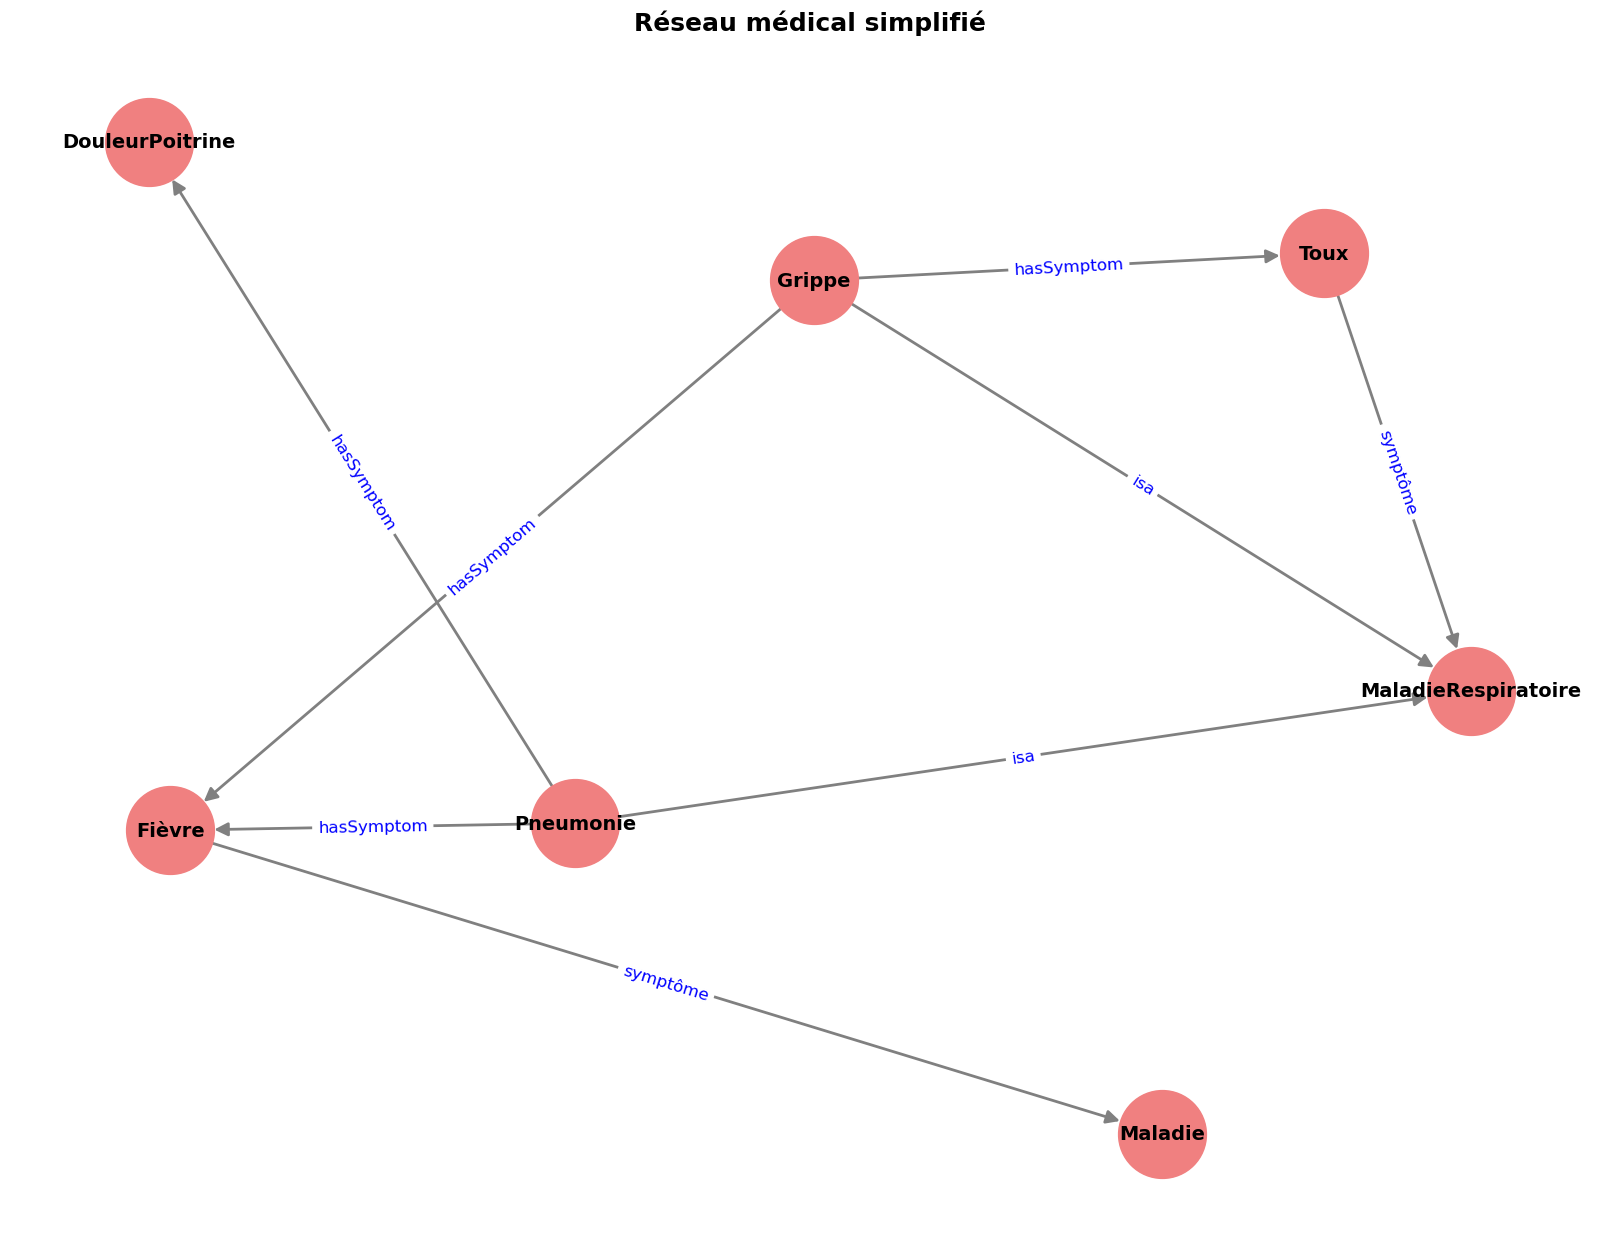

In [ ]:
G = nx.DiGraph()

G.add_edge("Grippe", "MaladieRespiratoire", relation="isa")
G.add_edge("Pneumonie", "MaladieRespiratoire", relation="isa")

G.add_edge("Grippe", "Fièvre", relation="hasSymptom")
G.add_edge("Grippe", "Toux", relation="hasSymptom")
G.add_edge("Pneumonie", "Fièvre", relation="hasSymptom")
G.add_edge("Pneumonie", "DouleurPoitrine", relation="hasSymptom")

G.add_edge("Fièvre", "Maladie", relation="symptôme")
G.add_edge("Toux", "MaladieRespiratoire", relation="symptôme")

def get_symptoms(maladie):
    """
    Retourne tous les symptômes directs de la maladie
    """
    return {succ for succ in G.successors(maladie) if G[maladie][succ]['relation'] == "hasSymptom"}

patient_symptomes = {"Fièvre", "Toux"}

maladies = ["Grippe", "Pneumonie"]
maladies_possibles = []

for m in maladies:
    symptomes_maladie = get_symptoms(m)
    if patient_symptomes.issubset(symptomes_maladie):
        maladies_possibles.append(m)

print("Symptômes du patient :", patient_symptomes)
print("Maladies possibles :", maladies_possibles)

plt.figure(figsize=(16, 12))  
pos = nx.spring_layout(G, seed=42, k=2)  
nx.draw(G, pos, with_labels=True, 
        node_size=4000,  
        node_color="lightcoral", 
        font_size=14,  
        font_weight="bold",
        arrows=True,
        arrowsize=20,  
        edge_color='gray',
        width=2)  

edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, 
                              font_color='blue', 
                              font_size=12)  

plt.title("Réseau médical simplifié", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()